In [587]:
import pandas as pd
pd.__version__

'1.4.4'

In [588]:
#detailed code with comments
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
#from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 600x300 with 0 Axes>

In [589]:
#Load the data
cust_demo = pd.read_excel("C:/Users/rajsh/OneDrive/Desktop/ML projects/11. Capstone Case Study - Predict Cred Card Consumption/CustomerDemographics.xlsx")
cust_behaviour = pd.read_excel("C:/Users/rajsh/OneDrive/Desktop/ML projects/11. Capstone Case Study - Predict Cred Card Consumption/CustomerBehaviorData.xlsx")
credit_consumption = pd.read_excel("C:/Users/rajsh/OneDrive/Desktop/ML projects/11. Capstone Case Study - Predict Cred Card Consumption/CreditConsumptionData.xlsx")

In [590]:
cust_consumption = pd.merge(cust_demo , cust_behaviour, how='inner', left_on = ['ID'], right_on = ['ID'])
cust_consumption

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91


In [591]:
df = pd.merge(cust_consumption , credit_consumption , how='inner', left_on = ['ID'], right_on = ['ID'])
df

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


### Basic information about data - EDA

In [592]:
df.shape

(20000, 49)

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

In [594]:
df.isnull().sum()

ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

In [595]:
 # Create a separate data using the records where column has missing values
df_mis = df[df['cc_cons'].isnull()]
df_mis

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

In [596]:
# Filter out the records with non_missing values
df_nonmis = df.dropna(subset = ['cc_cons'])

In [487]:
#df_nonmis.dropna(subset = ['cc_cons_may', 'dc_cons_jun', 'cc_count_apr','personal_loan_closed','investment_3','debit_count_apr','loan_enq','emi_active'], inplace=True)

In [597]:
df_nonmis.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,1.500000e+04,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04,15000.000000
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,17957.391719,8171.098287,1.633705e+04,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04,55157.729867
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,2.706085e+04,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05,97670.972252
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.027500,1634.000000,3.638000e+03,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,6768.000000
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,8.695030e+03,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03,13364.000000
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,1.895130e+04,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,19998.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,1.117246e+06,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [598]:
corr= df_nonmis.corr()
corr

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,-0.001936,-0.007564,0.000827,-0.003070,-0.001593,-0.002351,0.006757,-0.005333,0.016962,...,-0.012113,0.005933,-0.005219,0.004099,0.001776,-0.003272,-0.011713,0.002199,0.002639,0.004666
age,-0.001936,1.000000,0.810114,0.002274,0.009568,0.018551,0.000125,0.007961,0.017420,-0.001586,...,0.004107,0.018281,0.007327,-0.001059,-0.009463,-0.007759,0.000215,-0.001743,0.004290,-0.006965
Emp_Tenure_Years,-0.007564,0.810114,1.000000,-0.004545,0.011645,0.012030,0.007055,0.005367,0.015731,-0.004784,...,-0.000899,0.023339,-0.002833,0.004395,-0.007823,-0.010291,-0.005712,-0.003383,-0.000594,-0.008416
Tenure_with_Bank,0.000827,0.002274,-0.004545,1.000000,-0.003683,-0.005822,0.009385,-0.006918,-0.007355,0.013001,...,-0.000122,0.004599,0.011888,-0.000062,0.001958,-0.009559,-0.000846,-0.006441,0.002457,0.011538
region_code,-0.003070,0.009568,0.011645,-0.003683,1.000000,0.006838,-0.017239,0.006899,-0.010570,-0.010820,...,-0.006829,0.002518,-0.003501,0.023946,0.000790,0.002281,0.010512,0.000875,0.003976,-0.018824
NetBanking_Flag,-0.001593,0.018551,0.012030,-0.005822,0.006838,1.000000,0.009017,0.003291,-0.006536,-0.002122,...,0.009354,-0.013535,0.003559,-0.016023,0.002795,0.011630,-0.000539,0.002451,0.004642,0.001640
Avg_days_between_transaction,-0.002351,0.000125,0.007055,0.009385,-0.017239,0.009017,1.000000,0.009393,0.009889,0.013300,...,0.002698,-0.000094,0.002593,-0.005507,0.001218,-0.004596,0.000670,0.013174,0.004431,-0.005439
cc_cons_apr,0.006757,0.007961,0.005367,-0.006918,0.006899,0.003291,0.009393,1.000000,0.000455,0.004885,...,-0.003245,0.003222,-0.002136,0.001587,-0.008461,-0.007487,0.012826,-0.004225,0.001389,0.006155
dc_cons_apr,-0.005333,0.017420,0.015731,-0.007355,-0.010570,-0.006536,0.009889,0.000455,1.000000,0.004183,...,0.001819,0.000777,0.004435,-0.002538,-0.007223,-0.005774,-0.002386,-0.017862,0.000660,-0.000126
cc_cons_may,0.016962,-0.001586,-0.004784,0.013001,-0.010820,-0.002122,0.013300,0.004885,0.004183,1.000000,...,-0.004070,-0.000307,0.009464,-0.005004,0.009098,0.001989,-0.014621,-0.004125,0.000929,0.021822


<AxesSubplot:>

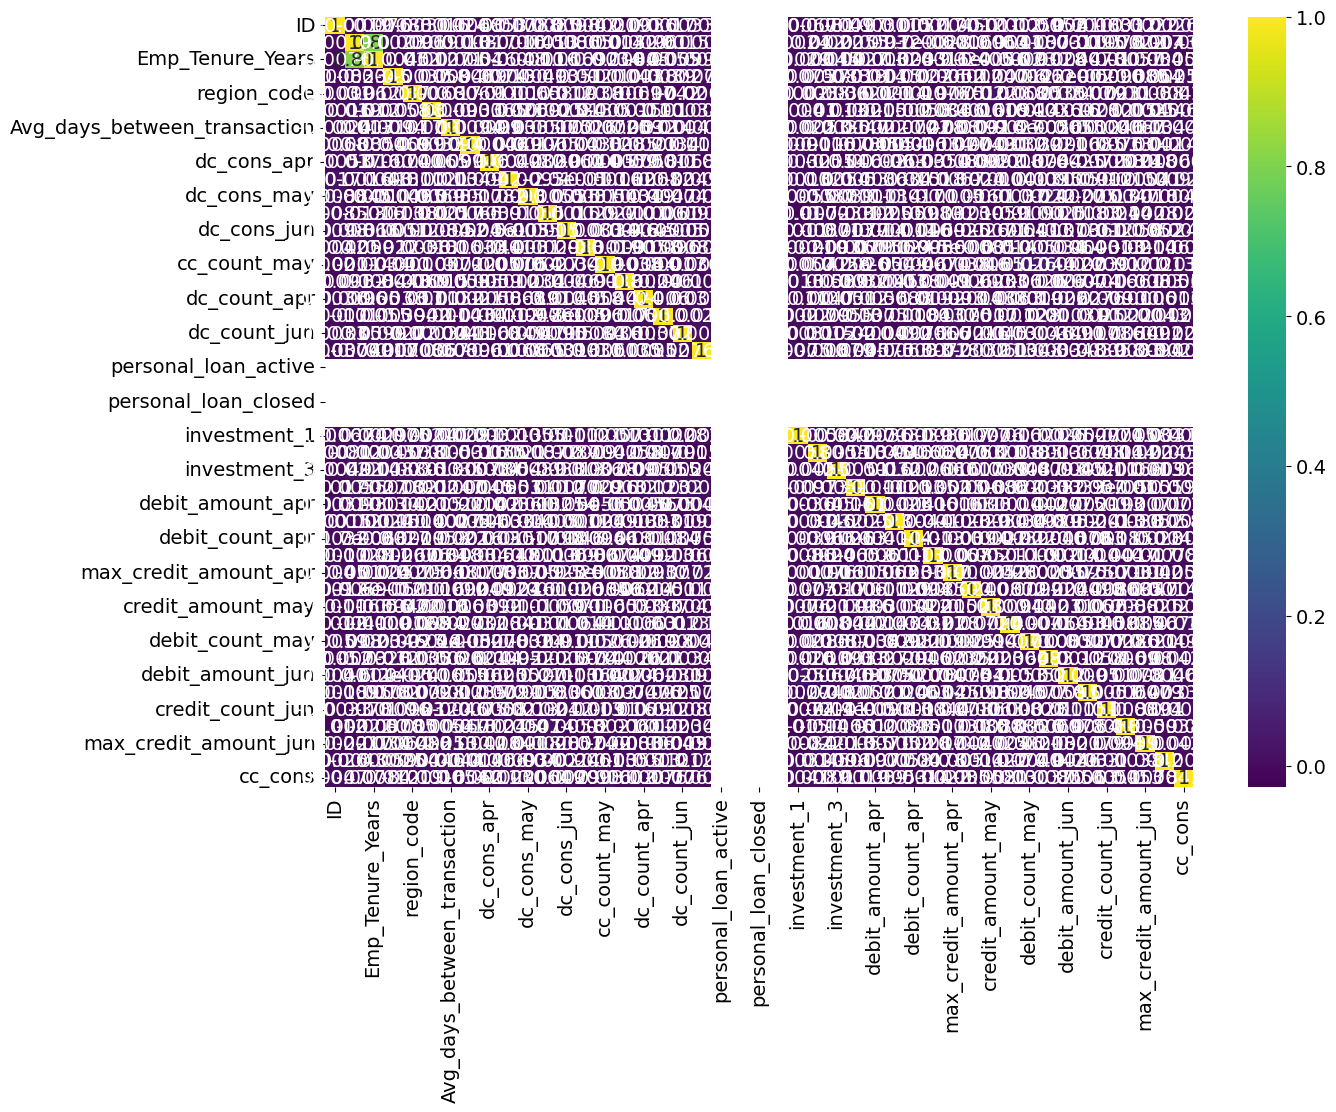

In [599]:
plt.figure(figsize=(14,10))
sns.heatmap(df_nonmis.corr(),annot=True,cmap='viridis')
#plt.ylim(10, 0)
#their is no meaningful corelation among the variables

In [600]:
df_nonmis.corr()['cc_cons_jun']

ID                              0.008500
age                            -0.013386
Emp_Tenure_Years               -0.015891
Tenure_with_Bank               -0.012819
region_code                    -0.008059
NetBanking_Flag                -0.002462
Avg_days_between_transaction    0.001734
cc_cons_apr                     0.006478
dc_cons_apr                     0.003859
cc_cons_may                    -0.010209
dc_cons_may                    -0.005497
cc_cons_jun                     1.000000
dc_cons_jun                     0.001546
cc_count_apr                    0.002901
cc_count_may                    0.002671
cc_count_jun                    0.010075
dc_count_apr                   -0.010180
dc_count_may                   -0.006118
dc_count_jun                    0.000952
card_lim                        0.000393
personal_loan_active                 NaN
vehicle_loan_active                  NaN
personal_loan_closed                 NaN
vehicle_loan_closed                  NaN
investment_1    

In [601]:
df_nonmis = df_nonmis.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','ID','region_code'], axis = 1)

### Feature engineering

In [602]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [603]:
# creating a copy of the data
df_nonmis_continuous = df_nonmis.select_dtypes(include=['float64', 'int64'])
df_nonmis_categorical = df_nonmis.select_dtypes(include=['object'])

# creating the variables with column names
df_nonmis_cat_variables = df_nonmis.select_dtypes('object').columns
df_nonmis_conti_variables = df_nonmis.select_dtypes('float64','int64').columns

In [604]:
df_nonmis_continuous.apply(continuous_var_summary)

,age,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,...,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,43,270,10,2,19,7408,3638,7461,3786,6525,...,31,57,4862,7533,7338,39,66,5348,5393,12260
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,14999,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000
nmiss,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
perc_miss,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0
sum,716859,227760.1,82650,10793,165733.0,269360875.785,122566474.3,245055819.935,115554078.05,181935162.48,...,178847,614953,857818585.48,1142398008.52,1177547451.85,299196,669718,788798143.17,236405030.79,827365948.0
mean,47.7906,15.184007,5.51,0.719533,11.049603,17957.391719,8171.098287,16337.054662,7703.605203,12129.010832,...,11.923133,40.996867,57187.905699,76159.867235,78503.163457,19.9464,44.647867,52586.542878,15761.386145,55157.729867
std,30.632766,20.312648,2.865783,0.449242,5.492379,25187.939958,14773.029481,27060.849683,18987.296785,18488.781136,...,16.843563,40.537354,200019.354212,154511.208485,148200.451695,27.200165,35.089082,128260.093583,117919.120175,97670.972252
var,938.366376,412.603682,8.212714,0.201819,30.166229,634432319.346922,218242400.040911,732289585.559161,360517439.203241,341835027.89548,...,283.705605,1643.277075,40007742059.35791,23873713547.389736,21963373882.66935,739.848984,1231.243685,16450651605.802151,13904918902.771996,9539618820.721489


In [605]:
#outliers treatment
df_nonmis_continuous = df_nonmis_continuous.apply( lambda x: x.clip( lower = x.quantile(0.05), upper = x.quantile(0.95) ) )

In [606]:
df_nonmis_continuous = df_nonmis_continuous.apply( lambda x: x.fillna( x.mean() ) )

In [607]:
df_nonmis_continuous.apply(continuous_var_summary)

,age,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,32,198,10,2,20,6664,3294,6713,3402,5865,...,27,52,4392,6767,6584,37,58,4823,4862,10946
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,653018.0,198604.6,82650,10793,165744.049603,240059935.01,102873300.07,212312934.655,94100265.76,158691345.995,...,170186.0,577407.0,679238475.88,970872808.2,992935222.925,290938.0,662887.0,645320820.61,113702211.027402,797915377.5
mean,43.534533,13.240307,5.51,0.719533,11.049603,16003.995667,6858.220005,14154.195644,6273.351051,10579.423066,...,11.345733,38.4938,45282.565059,64724.85388,66195.681528,19.395867,44.192467,43021.388041,7580.147402,53194.3585
std,12.623104,10.657049,2.865783,0.449242,5.492196,16000.402479,7395.178208,14575.941111,6642.550636,10563.246639,...,15.000107,33.46138,38530.222898,55773.408821,59804.863696,25.309463,33.935958,37505.783026,9404.291891,91547.733635
var,159.342764,113.572695,8.212714,0.201819,30.164217,256012879.485717,54688660.721673,212458059.261805,44123478.946194,111582179.556784,...,225.003202,1119.663939,1484578076.532766,3110673131.53478,3576621721.642789,640.568928,1151.649267,1406683760.418346,88440705.979033,8380987533.626967


In [608]:
df_nonmis_categorical = pd.get_dummies( df_nonmis_categorical[['account_type', 'gender','Income','loan_enq']], drop_first = True )

In [609]:
df_nonmis = pd.concat([df_nonmis_categorical, df_nonmis_continuous], axis = 1 )

In [610]:
df_nonmis.shape

(15000, 43)

In [611]:
df_nonmis.isnull().sum()

account_type_saving             0
gender_M                        0
Income_LOW                      0
Income_MEDIUM                   0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_a

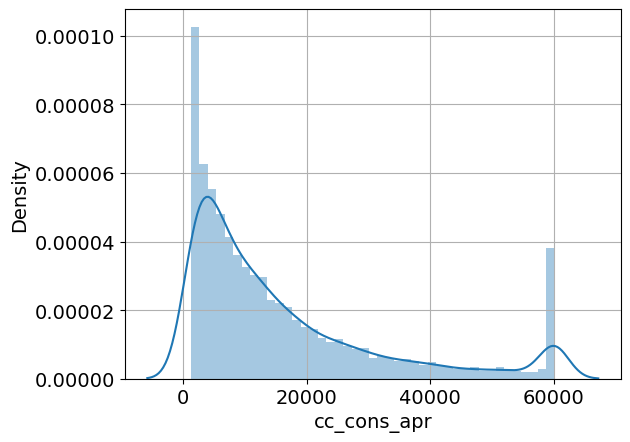

In [612]:
sns.distplot(df_nonmis.cc_cons_apr)
plt.show()

In [613]:
df_nonmis.cc_cons_apr.skew()

1.4803128119070321

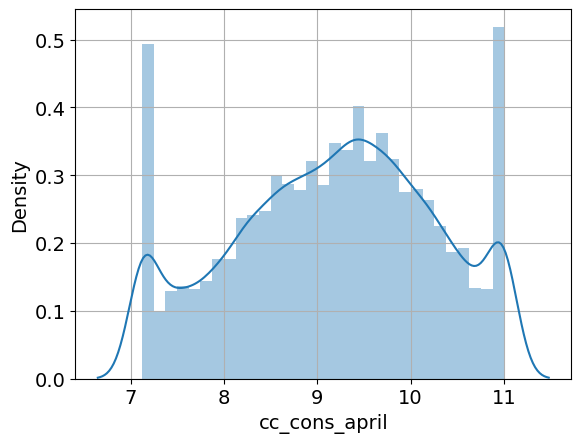

In [614]:
# apply log transformation: log is rescalling the data and making the distribution normal
df_nonmis.loc[:, 'cc_cons_april'] = np.log( df_nonmis.cc_cons_apr )
sns.distplot(df_nonmis.cc_cons_april)
plt.show()

In [615]:
df_nonmis.cc_cons_april.skew()

-0.16586062194071277

In [616]:
# Assuming your DataFrame is named 'data'
col = ['cc_cons_apr','cc_cons_may', 'cc_cons_jun']

df_nonmis[col] = np.log(df_nonmis[col])

df_nonmis[col] = np.log(df_nonmis[col] + 1)

In [617]:
df_nonmis.cc_cons_may.skew()

-0.31640478797881566

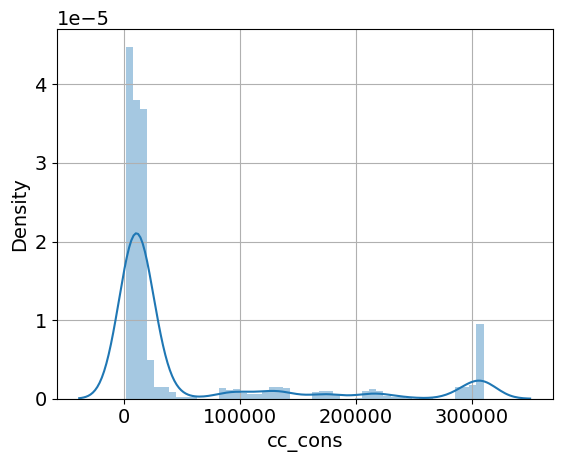

In [618]:
sns.distplot(df_nonmis.cc_cons)
plt.show()

In [620]:
df_nonmis.cc_cons.skew()

1.9927595876149578

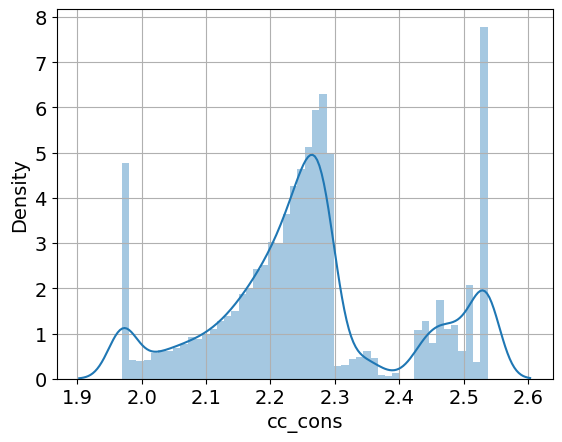

In [683]:
# apply log transformation: log is rescalling the data and making the distribution normal
df_nonmis.loc[:, 'cc_cons'] = np.log( df_nonmis.cc_cons )
sns.distplot(df_nonmis.cc_cons)
plt.show()

In [684]:
df_nonmis.cc_cons.skew()

0.2184478969940692

In [623]:
col= df_nonmis[['cc_cons_apr','cc_cons_may','cc_cons_jun']]

In [624]:
# data is stored in a DataFrame named 'df_new'
# target variable is stored in a Series named 'col'

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(df_nonmis.drop(columns = col) , col , test_size=0.3, random_state=42)


In [625]:
x_train.head()

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,age,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,dc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_april
11908,0,1,0,1,53.0,16.5,1,1,17.0,1181.6,...,82.0,14304.0,7196.425,33892.88,3.0,32.0,49000.25,13511.62,9.164925,8.589397
6010,0,1,0,1,62.0,8.4,8,1,11.0,8087.0,...,82.0,14766.0,32012.410,92494.00,6.0,7.0,62771.79,2566.83,12.597564,10.545102
9624,1,1,1,0,28.0,5.6,7,1,6.0,3106.0,...,24.0,47353.0,41973.580,167301.50,47.0,38.0,52651.00,1086.13,7.163056,10.857413
1683,0,1,0,1,34.0,11.2,9,0,10.0,4843.0,...,20.0,16433.0,130499.740,24119.81,15.0,38.0,40944.00,262.93,9.785605,9.818823
13106,1,0,0,1,42.0,13.2,1,1,4.0,2846.6,...,7.0,56000.0,20485.120,33766.00,49.0,83.0,50201.00,34723.41,9.265491,11.004715


In [626]:
y_train.head()

,cc_cons_apr,cc_cons_may,cc_cons_jun
11908,2.260658,2.271597,2.420429
6010,2.446261,2.258867,2.251790
9624,2.472953,2.083972,2.044466
1683,2.381287,2.308050,2.296591
13106,2.485300,2.313513,2.416670


In [627]:
lr = LinearRegression()

In [628]:
lr.fit(x_train,y_train)

LinearRegression()

In [629]:
y_pred = lr.predict(x_test)
y_pred

array([[2.39921838, 2.30222352, 2.2661512 ],
       [2.12775657, 2.2909459 , 2.27879607],
       [2.34875522, 2.29695887, 2.26843025],
       ...,
       [2.22804093, 2.29050152, 2.27674352],
       [2.10890492, 2.2853773 , 2.28692587],
       [2.27008736, 2.30447326, 2.28330705]])

In [630]:
y_test.values

array([[2.39998337, 2.46274559, 2.2050377 ],
       [2.11780696, 2.0731587 , 2.29248248],
       [2.35287548, 2.26389328, 2.23914043],
       ...,
       [2.23154988, 2.13234788, 2.13554305],
       [2.09462354, 2.34454024, 2.19782074],
       [2.27617182, 2.27916814, 2.18984149]])

In [631]:
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.0632655455915996


In [632]:
print("MSE", mean_squared_error(y_test,y_pred))

MSE 0.008365379919425231


In [633]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.09146245087152012


In [634]:
r2 = r2_score(y_test,y_pred)
r2

0.3303929313307787

In [635]:
#adjusted r2
x_test.shape

(4500, 41)

In [636]:
1-((1-r2)*(4499-47)/(4499-1-43))

0.3308438451817344

In [685]:
#in cc_conss store avg credit card spend in next three months
Tar_col = df_nonmis[['cc_cons']]

In [686]:
# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df_nonmis.drop(columns = Tar_col) , Tar_col , test_size=0.3, random_state=42)

In [687]:
X_train.head()

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,age,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons_april,cc_conss
11908,0,1,0,1,53.0,16.5,1,1,17.0,2.260658,...,82.0,14304.0,7196.425,33892.88,3.0,32.0,49000.25,13511.62,8.589397,2.215384
6010,0,1,0,1,62.0,8.4,8,1,11.0,2.446261,...,82.0,14766.0,32012.410,92494.00,6.0,7.0,62771.79,2566.83,10.545102,2.533503
9624,1,1,1,0,28.0,5.6,7,1,6.0,2.472953,...,24.0,47353.0,41973.580,167301.50,47.0,38.0,52651.00,1086.13,10.857413,1.968937
1683,0,1,0,1,34.0,11.2,9,0,10.0,2.381287,...,20.0,16433.0,130499.740,24119.81,15.0,38.0,40944.00,262.93,9.818823,2.280912
13106,1,0,0,1,42.0,13.2,1,1,4.0,2.485300,...,7.0,56000.0,20485.120,33766.00,49.0,83.0,50201.00,34723.41,11.004715,2.226297


In [688]:
Y_train.head()

,cc_cons
11908,2.215384
6010,2.533503
9624,1.968937
1683,2.280912
13106,2.226297


In [689]:
lr_T = LinearRegression()

In [690]:
lr_T.fit(X_train,Y_train)

LinearRegression()

In [691]:
Y_pred = lr_T.predict(X_test)
Y_pred

array([[2.23615612],
       [2.28302101],
       [2.23299574],
       ...,
       [2.53214863],
       [2.17369726],
       [2.25941455]])

In [692]:
r2 = r2_score(Y_test,Y_pred)
r2

1.0

In [693]:
percentage_error = np.abs((Y_test - Y_pred) / Y_test) * 100
percentage_error

,cc_cons
11610,1.191569e-13
6586,1.945182e-13
13278,4.375272e-13
973,3.906120e-14
6081,7.594170e-14
...,...
4328,4.171356e-13
13997,6.017382e-13
10575,3.156847e-13
7013,1.225808e-13


In [694]:
squared_error = percentage_error ** 2
squared_error

,cc_cons
11610,1.419838e-26
6586,3.783734e-26
13278,1.914300e-25
973,1.525777e-27
6081,5.767142e-27
...,...
4328,1.740021e-25
13997,3.620889e-25
10575,9.965683e-26
7013,1.502605e-26


In [695]:
mean_squared_error = np.mean(squared_error)
mean_squared_error

cc_cons    1.889322e-25
dtype: float64

In [696]:
root_mean_squared_percentage_error = np.sqrt(mean_squared_error)
root_mean_squared_percentage_error

cc_cons    4.346633e-13
dtype: float64

In [650]:
 # Create a separate data using the records where column has missing values
df_mis = df[df['cc_cons'].isnull()]
df_mis.head(1)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.9,369000.75,40,96,46088.0,Y,2646.72,NaN


In [651]:
X_pred = df_mis.drop('cc_cons', axis=1)


In [652]:
#X_pred.dropna(subset = ['cc_cons_may', 'dc_cons_jun', 'cc_count_apr','personal_loan_closed','investment_3','debit_count_apr','loan_enq','emi_active'], inplace=True)

In [653]:
X_pred = X_pred.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','ID','region_code'], axis = 1)

In [654]:
# creating a copy of the data
X_pred_continuous = X_pred.select_dtypes(include=['float64', 'int64'])
X_pred_categorical = X_pred.select_dtypes(include=['object'])

# creating the variables with column names
X_pred_cat_variables = X_pred.select_dtypes('object').columns
X_pred_conti_variables = X_pred.select_dtypes('float64','int64').columns

In [655]:
#outliers treatment
X_pred_continuous = X_pred_continuous.apply( lambda x: x.clip( lower = x.quantile(0.05), upper = x.quantile(0.95) ) )

In [656]:
X_pred_continuous = X_pred_continuous.apply( lambda x: x.fillna( x.mean() ) )

In [657]:
X_pred_continuous.apply(continuous_var_summary).head(2)

,age,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
dtype,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,32,194,10,2,20,3393,2241,3343,2243,3188,...,3309,27,52,2680,3391,3317,37,59,2763,2826


In [658]:
X_pred_categorical = pd.get_dummies(X_pred_categorical[['account_type', 'gender','Income','loan_enq']], drop_first = True )

In [659]:
X_pred = pd.concat([X_pred_categorical, X_pred_continuous], axis = 1 )

In [660]:
X_pred.shape

(5000, 42)

In [661]:
df_nonmis.shape

(15000, 44)

In [662]:
X_pred.isnull().sum()

account_type_saving             0
gender_M                        0
Income_LOW                      0
Income_MEDIUM                   0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_a

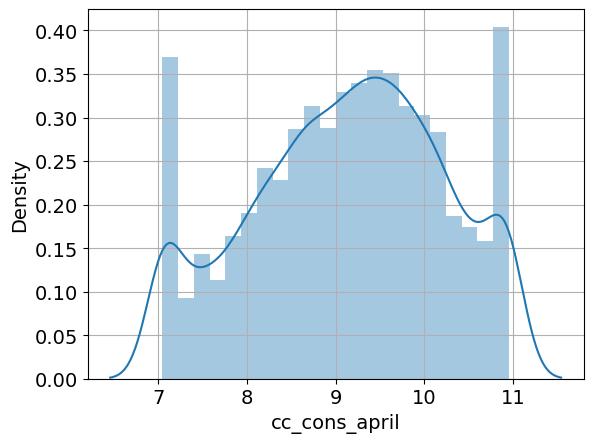

In [663]:
# apply log transformation: log is rescalling the data and making the distribution normal
X_pred.loc[:, 'cc_cons_april'] = np.log( X_pred.cc_cons_apr )
sns.distplot(X_pred.cc_cons_april)
plt.show()

In [664]:
# Assuming your DataFrame is named 'data'
col = ['cc_cons_apr','cc_cons_may', 'cc_cons_jun']

X_pred[col] = np.log(X_pred[col])

X_pred[col] = np.log(X_pred[col] + 1)

In [665]:
X_pred.cc_cons_may.skew()

-0.3278324369934059

In [666]:
# Predict the credit card consumption for the missing values
y_pred = lr_T.predict(X_pred)
y_pred

array([[9.70633937],
       [9.71365195],
       [9.61175305],
       ...,
       [9.45909905],
       [9.705844  ],
       [9.71566834]])

In [668]:
#fill the missing value(predicted value where target variable having missing value)
df.loc[df['cc_cons'].isnull(), 'cc_cons'] = y_pred
y_pred

array([[9.70633937],
       [9.71365195],
       [9.61175305],
       ...,
       [9.45909905],
       [9.705844  ],
       [9.71566834]])

In [559]:
# Extract columns from df1
df_nonmis_columns = df_nonmis.columns.tolist()

# Extract columns from df2
X_pred_columns = X_pred.columns.tolist()

# Get common columns
common_columns = list(set(df_nonmis_columns).intersection(X_pred_columns))

# Get columns unique to df1
df_new_unique_columns = list(set(df_nonmis_columns) - set(X_pred_columns))

# Get columns unique to df2
X_pred_unique_columns = list(set(X_pred_columns) - set(df_nonmis_columns))
df_new_unique_columns

['cc_cons']